# EDA 

Analisis exploratorio de datos sobre el dataset

Alumnos: 
 * Abritta Carolina
 * Sittner Simon

In [1]:
#Importo las librerías necesarias para realizar el EDA.
import pandas as pd
import numpy as np
#Librerias para graficos
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer

## INTRODUCCION

En el presente notebooks, se realizara el Análisis Exploratorio de Datos, el dataframe en cuenstión contiene información sobre la empresa "Telco NN".

El dataset importado, presenta una cartera de clientes de 7043 personas con 22 variables, con la siguiente información:

- Unnamed 0: Número de identificación de la publicación
- Customer ID: Valor identificador de clientes
- gender: Género cliente
- SeniorCitizien: Si el cliente es un SeniorCitizien o no
- Partner: Si el cliente tiene un socio o no
- Dependents: Si el cliente tiene dependientes o no
- tenure: Antigüedad cliente
- PhoneService: Si el cliente tiene un servicio de telefono o no
- MultipleLines: Si el cliente tiene multiples lineas o no
- InternetService: Tipo de servicio de internet que recibe. Si es que recibe
- OnlineSecurity: Si el cliente tiene un servicio de seguridad online o no
- OnlineBackup: Si el cliente tiene un servicio de backup o no
- DeviceProtection: Si el cliente tiene asegurado el dispositivo o no
- TechSupport: Si el cliente tiene soporte de tecnología o no
- StreamingTV: Si el cliente tiene servicio de streaming o no
- StreamingMovies: Si el cliente tiene servicios de streaming de peliculas o no
- Contract: Tipo de contrato
- PaperlessBilling: Si el cliente recibe la factura en papel o no
- PaymentMethod: Tipo de pago
- MonthlyCharges: Costo mensual
- TotalCharges: Cargos totales
- Churn: Si el cliente se fue de la compañía o no

In [2]:
# Configurar el estilo global
palette = sns.color_palette("husl", 2)
palette2 = sns.color_palette("husl", 3)
sns.color_palette("husl")

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

In [3]:
#Importamos el dataframe le colocamos la columna de numeración como índice y verificamos las primeras filas

telco = pd.read_csv('telco_churn_clusterai.csv',index_col=0)
telco_df=pd.DataFrame(telco)

##### Verifico que se hayan cargado correctamente y veo que tipo de datos tienen

In [4]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,Yes,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,NaN,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,NaN,No,NaN,NaN,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [5]:
#Se verifica el tamaño del dataset y se analiza su composición (imprimo el resultado)
np.shape(telco_df)
print(f'El tamaño del dataset es de '+str(np.shape(telco_df)[0]) + ' filas y ' +str(np.shape(telco_df)[1]) + ' columnas') 

El tamaño del dataset es de 7043 filas y 21 columnas


## Preprocesamiento de los Datos

In [6]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df = telco_df[telco_df['TotalCharges'].notna()]
telco_df['PaymentMethod'] = telco_df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
df_sn=telco_df.dropna()
telco_df['SeniorCitizen'].fillna(telco_df['SeniorCitizen'].mode()[0], inplace=True)
telco_df['Dependents'].fillna(telco_df['Dependents'].mode()[0], inplace=True)
telco_df.loc[telco_df['TotalCharges'] <= 1500] = (telco_df.loc[telco_df['TotalCharges'] <= 1500].fillna(telco_df.loc[telco_df['TotalCharges'] <= 1500].Contract.mode()))
tot_mnew=telco_df.loc[telco_df['TotalCharges'] <= 1500]
tot_3000 = telco_df.loc[(telco_df['TotalCharges'] > 3000)]
telco_df.loc[telco_df['TotalCharges'] >= 3000] = (telco_df.loc[telco_df['TotalCharges'] >= 3000].fillna(telco_df.loc[telco_df['TotalCharges'] >= 3000].Contract.mode()))
telco_df.Contract = telco_df.Contract.fillna(telco_df.Contract.mode().iloc[0])
telco_df['PhoneService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['PhoneService']) and row['MultipleLines'] == 'No phone service' else ("Yes" if pd.isnull(row['PhoneService']) and row['MultipleLines'] == "Yes" else row['PhoneService']), axis=1)
telco_df['MultipleLines'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['MultipleLines']) and row['PhoneService'] == 'No'  else row['MultipleLines'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['OnlineSecurity'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['OnlineBackup'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['DeviceProtection'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['TechSupport'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['StreamingTV'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['InternetService'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['InternetService']) and row['StreamingMovies'] == 'No internet service' else row['InternetService'], axis=1)
telco_df['MonthlyCharges']=telco_df['MonthlyCharges'].fillna(telco_df['TotalCharges']/telco_df['tenure']) 
telco_df['tenure']=telco_df['tenure'].fillna(telco_df['TotalCharges']/telco_df['MonthlyCharges'])

In [7]:
columnas_a_llenar = ['Partner','PhoneService', 'PaperlessBilling','PaymentMethod','InternetService','PhoneService', 'OnlineSecurity','OnlineBackup']
for columna in columnas_a_llenar:
    if telco_df[columna].isnull().any():
        distribucion_columna = telco_df[columna].value_counts(normalize=True)
        nulos_columna = telco_df[columna].isnull().sum()
        telco_df.loc[telco_df[columna].isnull(), columna] = np.random.choice(distribucion_columna.index, p=distribucion_columna.values, size=nulos_columna)
        
telco_df['MultipleLines'] = telco_df.apply(lambda row: 'No' if pd.isnull(row['MultipleLines']) and row['PhoneService'] == 'No'  else row['MultipleLines'], axis=1)
distribucion_MultipleLines = telco_df['MultipleLines'].value_counts(normalize=True)
nulos_MultipleLines = telco_df['MultipleLines'].isnull().sum()
telco_df.loc[telco_df['MultipleLines'].isnull(), 'MultipleLines'] = np.random.choice(distribucion_MultipleLines.index, p=distribucion_MultipleLines.values, size=nulos_MultipleLines)
telco_df.dropna(inplace=True) 

## EDA

Una vez termiando de imputar los valores nulls y dropeando los NAN, podemos hacer  un análisis exploratorio de datos para entender particularidades de los datos.

In [8]:
telco_df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5977,5977,5977.000000,5977,5977,5977.000000,5977,5977,5977,5977,...,5977,5977,5977,5977,5977,5977,5977,5977.000000,5977.000000,5977
unique,5977,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3018,NaN,3083,4416,NaN,5353,2904,2572,2938,...,2631,2951,2381,2352,3735,3576,2061,NaN,NaN,4379
mean,NaN,NaN,0.143550,NaN,NaN,32.403237,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.884835,2283.529923,NaN
std,NaN,NaN,0.350662,NaN,NaN,24.545351,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.135453,2271.261131,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.925000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.750000,401.100000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.400000,1400.300000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.050000,3794.500000,NaN


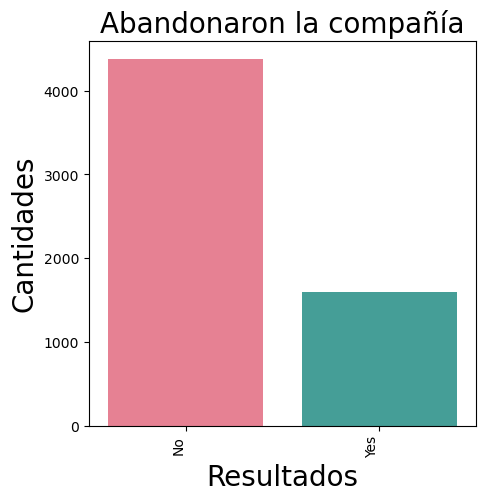

In [9]:
# Generamos un gráfico de barras y calculamos la tasa de abandono de la compañía

idx_top = telco_df['Churn'].value_counts(ascending=False).index[0:20]

plt.figure(figsize=(5,5))
g = sns.countplot(data=telco_df,
                  x="Churn",
                  order=idx_top,
                  palette = palette
                 )
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Abandonaron la compañía', size = 20)
plt.xlabel("Resultados", size = 20)
plt.ylabel("Cantidades", size = 20)
plt.show()

In [10]:
total_customers = telco_df['customerID'].nunique()
churned_customers = telco_df[telco_df['Churn'] == 'Yes']['customerID'].nunique()
churn_rate = churned_customers / total_customers
print('La tasa de abandono de la empresa Telco NN es: {:.2%}'.format(churn_rate))

La tasa de abandono de la empresa Telco NN es: 26.74%


## Se analizan los dos tipos de variables presentes (categóricas y numéricas) por separado.

In [11]:
# Variables numéricas
var_num=['MonthlyCharges','TotalCharges','tenure']

# Variables categóricas
var_cat=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

### Variables númericas 

Media de MonthlyCharges: 64.88483481700166
Media de TotalCharges: 2283.5299230383134
Media de tenure: 32.40323656661805


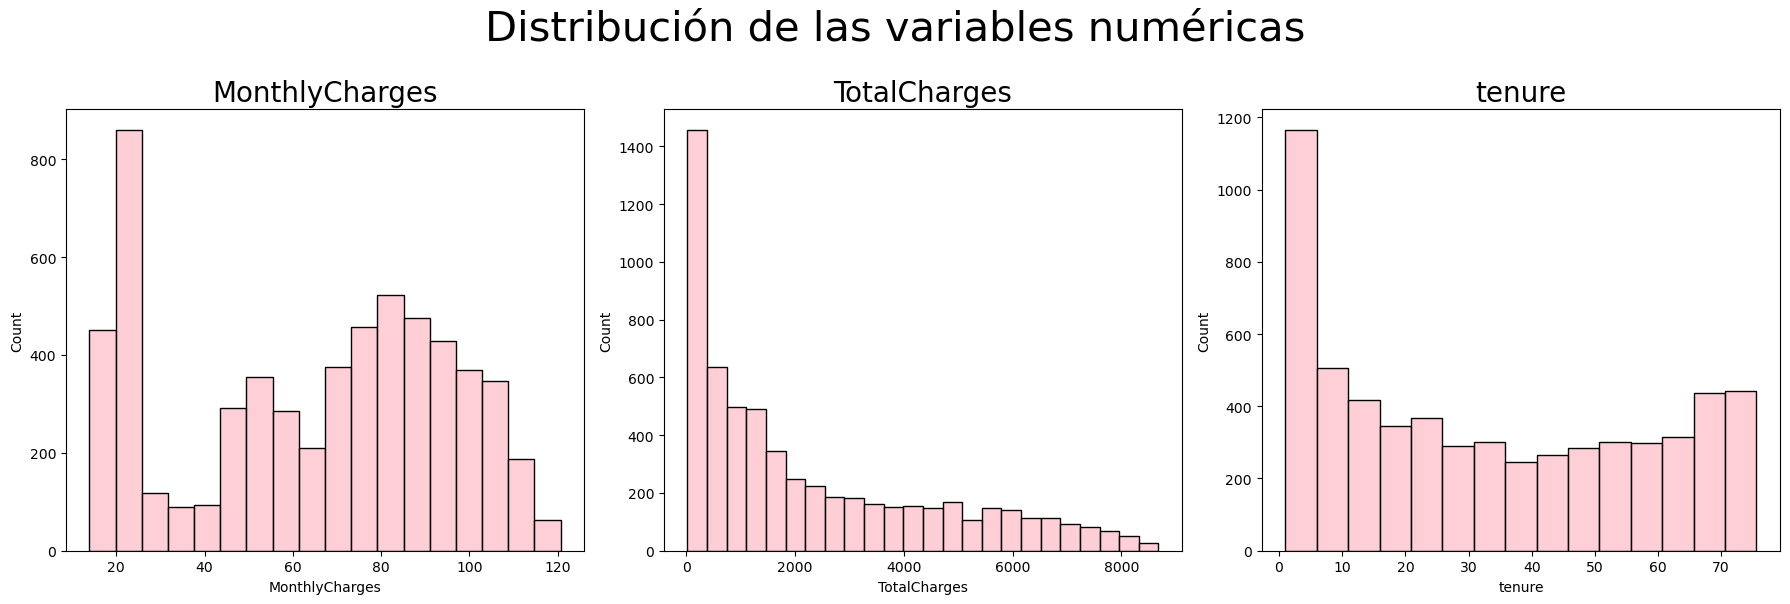

In [12]:
# Generamos histogramas de las variables numéricas y observamos su distribución

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

fig.suptitle('Distribución de las variables numéricas', fontsize=30, y=1.0)
for i, col in enumerate(var_num):
    sns.histplot(x=col, data=telco_df, ax=axs[i], kde=False, color='pink')
    axs[i].set_title(col, fontsize=20)
    print(f'Media de {col}: {telco_df[col].mean()}')
    
plt.tight_layout()
plt.show()

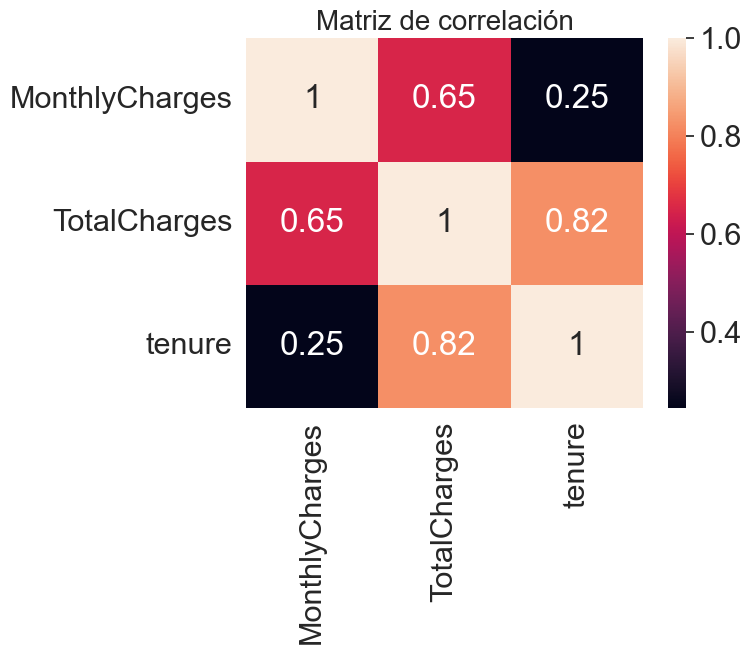

In [13]:
# Correlación entre variables numéricas
corr_matrix = telco_df[var_num].corr()
cmap = sns.color_palette("husl", as_cmap=True)
sns.set(font_scale=2)
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación', fontsize=20)
plt.show()

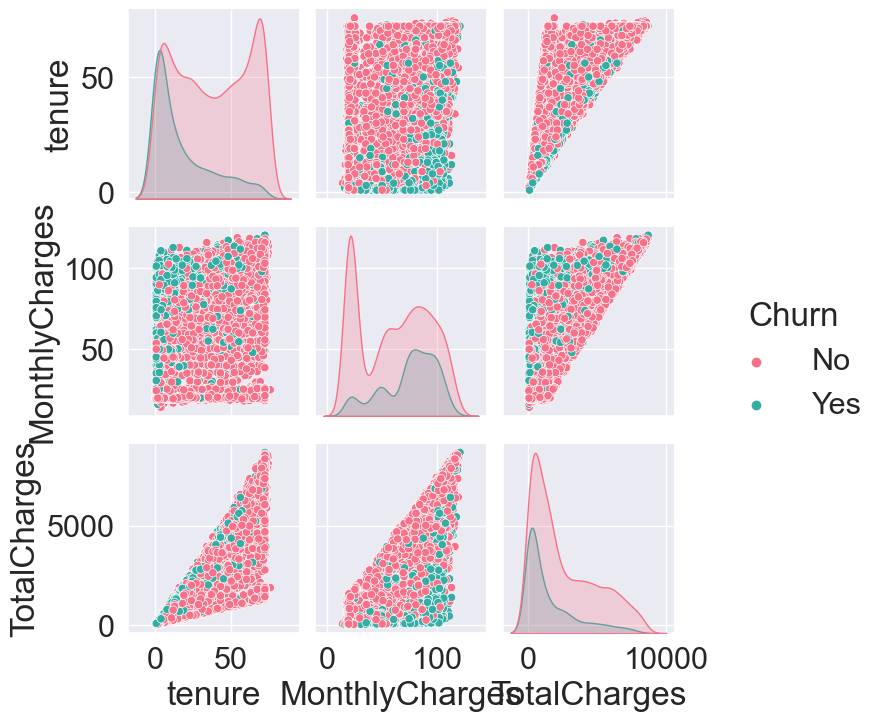

In [14]:
#Pairplot de las variables numéricas con la variable 'Churn'. 
sns.pairplot(telco_df,hue='Churn',vars=['tenure', 'MonthlyCharges', 'TotalCharges'],palette=palette)
plt.show()

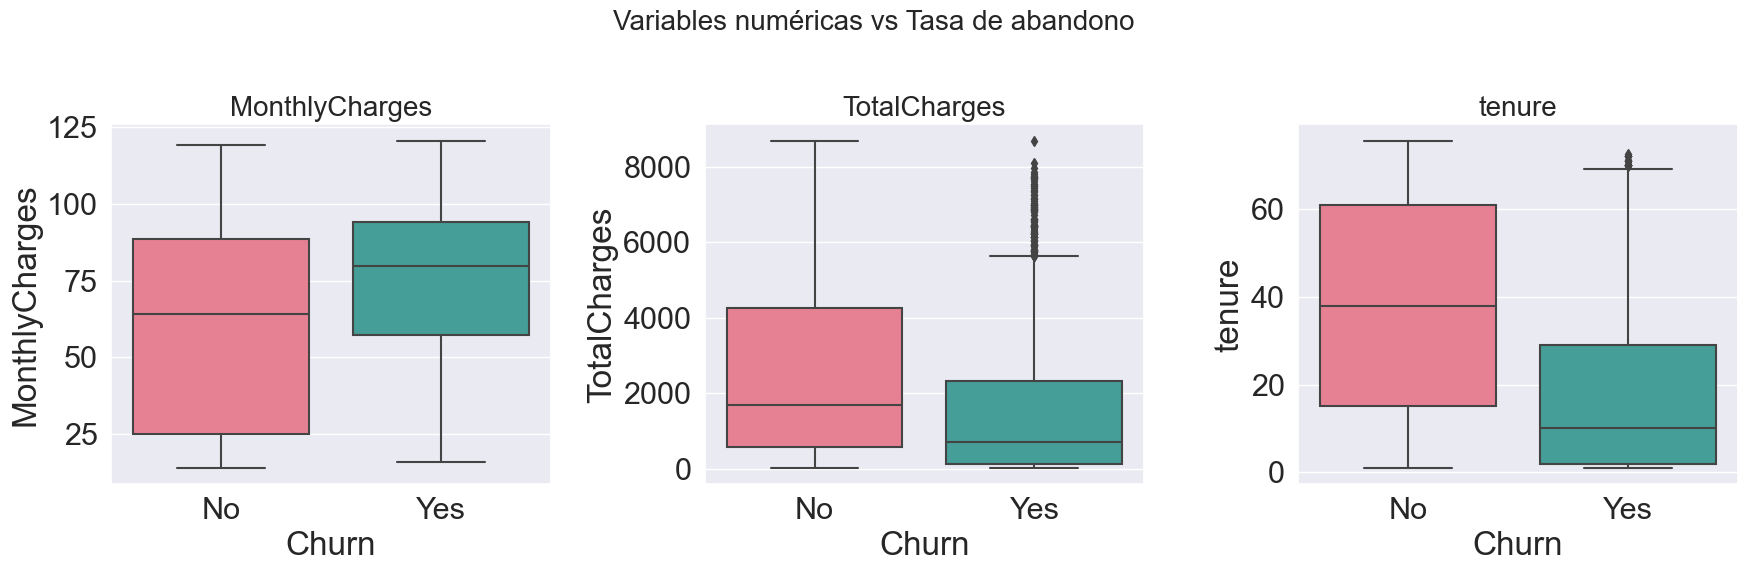

In [15]:
# Generamos boxplots mostrando la relación entre las variables numéricas y la tasa de abandono

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Variables numéricas vs Tasa de abandono', fontsize=20)

for i, col in enumerate(var_num):
    sns.boxplot(x='Churn', y=col, data=telco_df, ax=axs[i],order=idx_top, palette=palette)
    axs[i].set_title(col, fontsize=20)

plt.tight_layout()
plt.show()

Existen algunos valores outliers de churn en clientes de mucha antiguedad

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

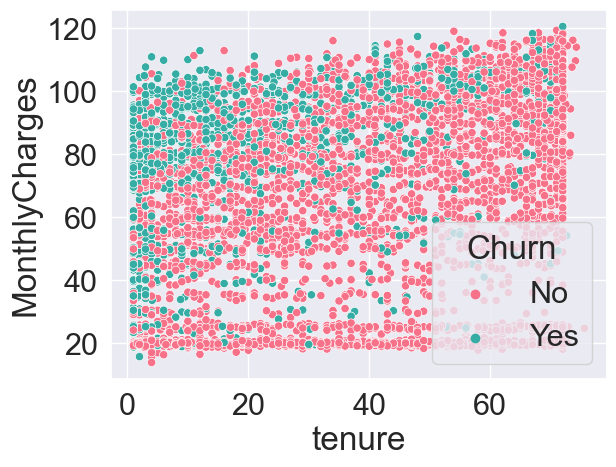

In [16]:
#Para ver la relación con más claridad entre ambas variables se crea un scatterplot
sns.scatterplot(x='tenure',y='MonthlyCharges',data=telco_df,hue='Churn', palette=palette)

Se puede obserbar que las suscpriciones de más de 70 dólares son las que tienen mayor churn, mientras que las de 20 serían las más estables

In [17]:
#Bandas de precios con churn
telco_df.loc[(telco_df['MonthlyCharges'] > 0) & (telco_df['MonthlyCharges'] <= 35), 'Banda'] = 'Menor a 35'
telco_df.loc[(telco_df['MonthlyCharges'] > 35) & (telco_df['MonthlyCharges'] <= 70), 'Banda'] = 'Entre 35 y 70'
telco_df.loc[(telco_df['MonthlyCharges'] > 70), 'Banda'] = 'Mayor a 70'

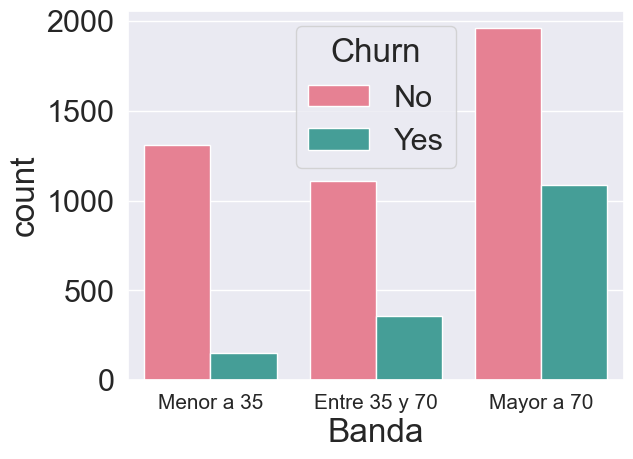

In [18]:
#Countplot de outcome en texto por rango etario. 
sns.countplot(data=telco_df,x='Banda',hue='Churn', palette=palette) 
plt.xticks(ha='center', fontsize=15)
plt.show()

De los gráficos se pueden sacar ciertas conclusiones: 
1) La duración del contrato, el cargo mensual y el tipo de servicio contratado son variables importantes a considerar para la retención de clientes.
2) La mayor cantidad de Churn esta en los monthly charges más altos con menor antigüedad.
3) Si bien hay algunos churn en montos bajos mensuales y tenure alto, parece que es un sector de usuarios más consolidado.


### Variables categoricas

Tambien se puede hacer un análisis sobre las variables categóricas. Del análisis de nulos ya sabemos que el género no es una variable categórica de importancia. Una variable interesante a tener en cuenta son las suscripciones del tipo 'Senion Citizen'

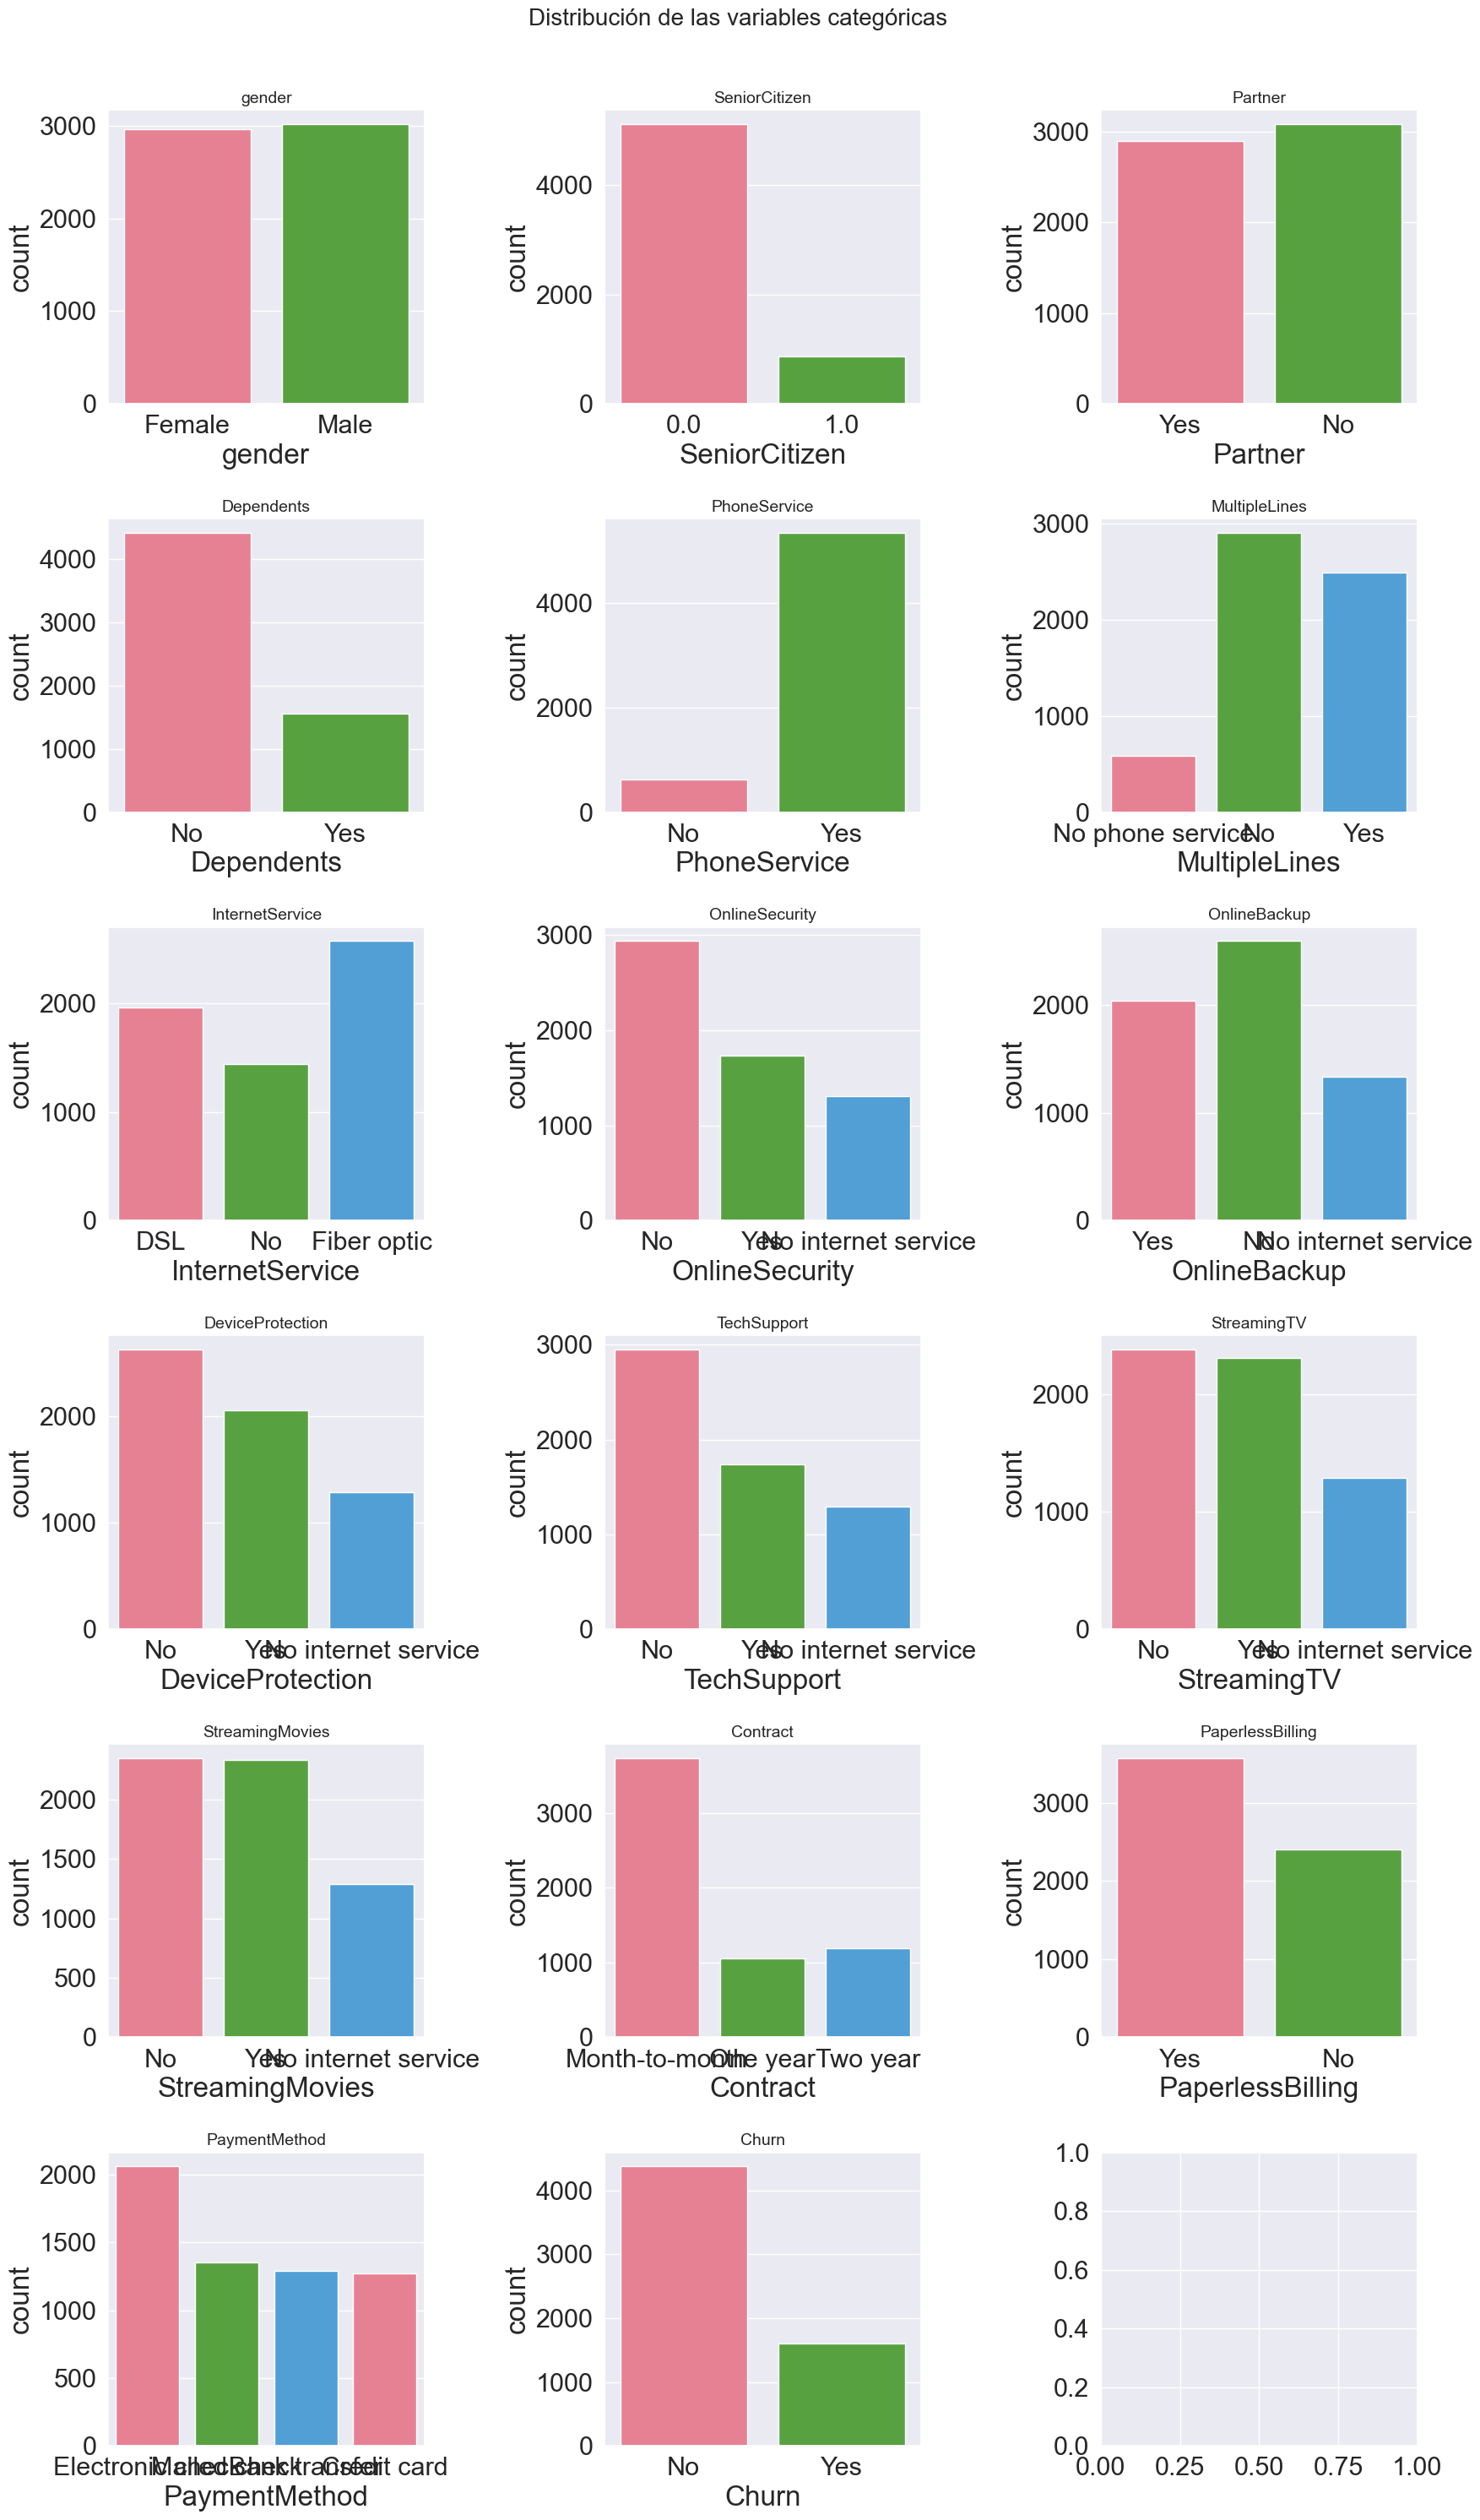

In [19]:
#Distribución de variables categóricas

fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))
fig.suptitle('Distribución de las variables categóricas', fontsize=20, y=1.0)

# Variables categóricas
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    if row<6:
        sns.countplot(x=col, data=telco_df, ax=axs[row][pos], palette=palette2)
        axs[row][pos].set_title(col, fontsize=14)
    
plt.tight_layout()
plt.show()

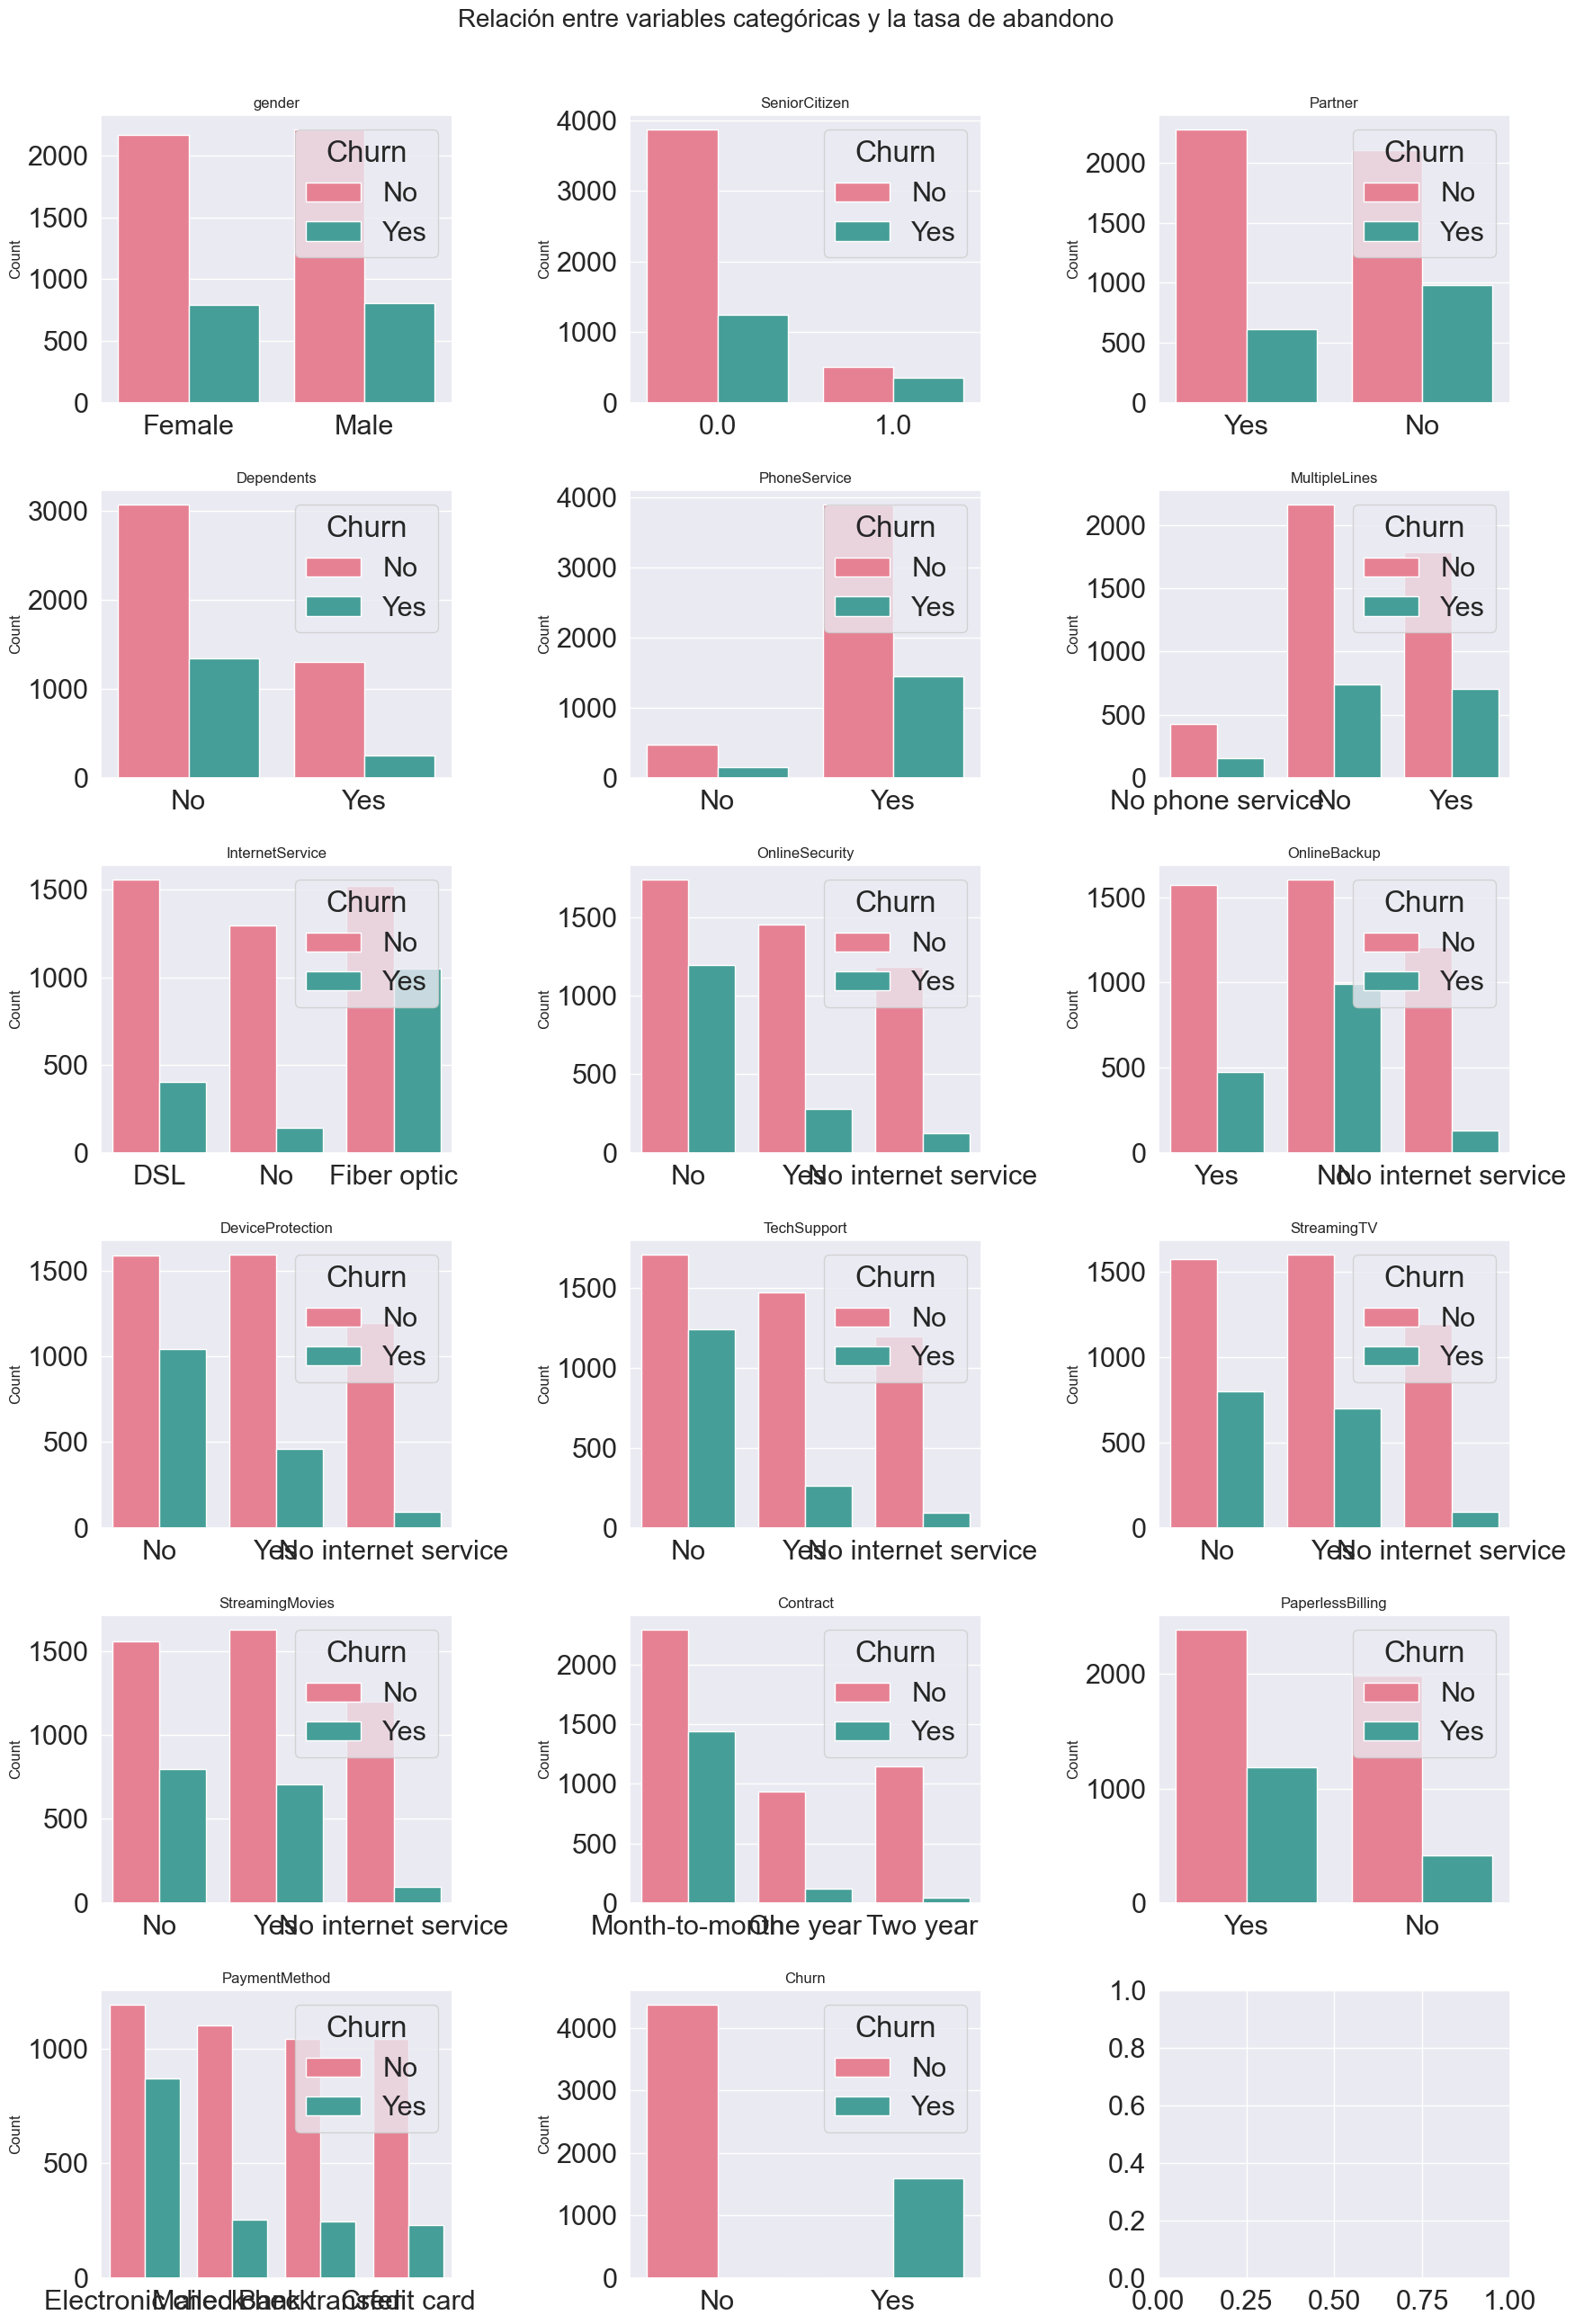

In [20]:
# Relación entre variables categóricas y Churn
var_cat = telco_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(18, 26))
fig.suptitle('Relación entre variables categóricas y la tasa de abandono', fontsize=20, y=1.0)

for i, col in enumerate(var_cat):
    row = i // 3
    pos = i % 3
    sns.countplot(x=col, hue='Churn', data=var_cat, ax=axs[row][pos],palette=palette)
    axs[row][pos].set_title(col, fontsize=12)
    axs[row][pos].set_xlabel('')
    axs[row][pos].set_ylabel('Count', fontsize=12)
    axs[row][pos].legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

Algunas conclusiones sacadas del análisis de los gráficos:
- Los usuarios con seniorcitizen tienen más tasa de abandono.
- El tipo de contrato, y el servicio de internet resultan en variables categóricas importantes.
- El pago electrónico tiene ligeramente mayor cantidad de usuarios, pero mucho más porcentaje de Churn

### Conclusiones del EDA

* Se observó que la tasa de abandono en el conjunto de datos es de aproximadamente el 26,5%. Además, se encontró que la duración media del contrato es de 32 meses, y que la mayoría de los clientes tienen facturación electrónica y servicios de telefonía fija e Internet.

* El análisis permitió encontrar la relación entre Total Charges y Tenure, dicha relación fue utilizada para completar nulos  
* Se observa una relación entre los clinetes que abandonan con el precio mensual (a menor precio menor probabilidad de abandono) y con La antigüedad del cliente (a mayor antigüedad menor probabilidad de abandono).
* Dentro de las variables categóricas el tipo de contrato resulta una de las que más relación tiene con el abandono de clientes. A mayor plazo de contrato se reduce drásticamente la tasa de abandono.
* Se observó que la mayoría de los clientes que abandonan la compañía tienen servicios de telefonía y múltiples líneas contratadas. Además, se encontró una relación entre el tipo de servicio y la tasa de abandono, siendo la fibra óptica, la que posee mayor cantdad de abandono.
* Por último el tipo de pago con cheque electrónico está relacionado a la mayor tasa de abandono.

Encontramos outliers en Churn según los meses y monthly charge según senior citizen. En función de los resultados del modelo seleccionador veremos como interfieren en los resultados.
